* **Title**: Africa Food programme - A Short Story
* **Audience**: 
    * Hamoye Internship Instructors (Data Storytelling track)
    * Data Scientists
    * Fellow Interns

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prod = pd.read_csv("https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv",
                   error_bad_lines = False
                  )

supply = pd.read_csv("https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv",
                     error_bad_lines = False
                    )

In [3]:
population = pd.read_excel("Africa_pop.xlsx")  
#Source:https://population.un.org/wpp/Download/Standard/Population/
population = population.drop(['2003', '2014'], axis=1)

population.head()

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Burundi,7131.688,7364.857,7607.850,7862.226,8126.104,8397.661,8675.606,8958.406,9245.992,9540.302
1,Comoros,597.230,611.625,626.427,641.624,657.227,673.251,689.696,706.578,723.865,741.511
2,Djibouti,771.599,783.248,794.554,805.456,816.361,827.820,840.194,853.671,868.136,883.296
3,Eritrea,2719.809,2826.653,2918.209,2996.540,3062.782,3119.920,3170.437,3213.969,3250.104,3281.453
4,Ethiopia,74239.508,76346.310,78489.205,80674.343,82916.236,85233.923,87639.962,90139.928,92726.982,95385.793


In [4]:
population = (population.set_index('Country') * 1000).astype(int).reset_index()

years = list(map(str, supply.Year.unique()))
population = pd.melt(population,
                     id_vars='Country',
                     value_vars=years,
                     var_name= 'Year',
                     value_name= 'Population'
                    )
population.head()

,Country,Year,Population
0,Burundi,2004,7131688
1,Comoros,2004,597230
2,Djibouti,2004,771599
3,Eritrea,2004,2719809
4,Ethiopia,2004,74239508


In [5]:
gdp_pc = pd.read_excel("africa_percapitaGDP.xlsx")  
#Source: https://unstats.un.org/unsd/snaama/Downloads
gdp_pc.head()

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Algeria,2610.182686,3113.094277,3478.709639,3950.513625,4923.630825,3883.270236,4480.786786,5455.843408,5592.223152,5499.587619
1,Egypt,1067.617527,1250.686680,1401.539876,1689.399910,2069.966233,2316.594660,2593.368405,2733.968454,3199.827727,3062.989012
2,Libya,5830.446721,7838.335308,9355.857102,10488.751578,15733.706861,11222.421490,13060.151806,6496.624235,16094.444253,10414.845264
3,Morocco,1986.973002,2053.639466,2238.996465,2536.317631,2933.301005,2909.488780,2882.110528,3092.283635,2956.083600,3168.422740
4,Sudan,711.935758,914.180732,1143.913538,1461.327413,1467.653879,1439.052139,1582.809233,1932.357044,1720.924295,1724.554598


In [6]:
gdp_pc = pd.melt(gdp_pc, id_vars='Country', 
                 value_vars=supply.Year.unique(),
                 var_name= 'Year',
                 value_name= 'gdp_per_capita'
                )
gdp_pc.sample(5)

,Country,Year,gdp_per_capita
81,Cameroon,2005,1011.879991
58,Morocco,2005,2053.639466
459,South Sudan,2012,952.587498
59,Sudan,2005,914.180732
250,D.R. of the Congo,2008,327.564649


# Checking Data and Data Quality

In [7]:
# convert to kilo metric tonnes
prod.Value = prod.Value * 1000
prod.sample(5)

,Country,Item,Year,Value
21196,Uganda,Crustaceans,2010,0
11760,Malawi,"Fats, Animals, Raw",2004,3000
7760,Ghana,Sorghum and products,2004,287000
13407,Morocco,Olives (including preserved),2011,1416000
1528,Benin,Pimento,2012,68000


In [8]:
# convert to kilo metric tonnes
supply.Value = supply.Value * 1000
supply.sample(5)

,Country,Year,Value
140,Gabon,2004,2676000
201,Lesotho,2005,2567000
343,Senegal,2007,2342000
79,Central African Republic,2013,1879000
270,Morocco,2004,3263000


In [9]:
assert set(prod.Country.unique()) == set(supply.Country.unique()), 
"Else, they do not have same Country names"

assert set(prod.Year.unique()) == set(supply.Year.unique()), 
"Else, reporting years differ"

In [11]:
print(set(prod.Country.unique()).difference(set(population.Country.unique())), 
      "are not in population dataframe")

print(set(prod.Country.unique()).difference(set(gdp_pc.Country.unique())), 
      "are not in gdp_pc dataframe")

{'Swaziland', "Cote d'Ivoire"} are not in population dataframe
{'Swaziland', "Cote d'Ivoire", 'United Republic of Tanzania'} are not in gdp_pc dataframe


In [12]:
population.loc[population.Country == "Côte d'Ivoire", 'Country'] = "Cote d'Ivoire"
population.loc[population.Country == "Eswatini", 'Country'] = 'Swaziland'

In [13]:
gdp_pc.loc[gdp_pc.Country == "Côte d'Ivoire", 'Country'] = "Cote d'Ivoire"
gdp_pc.loc[gdp_pc.Country == "Eswatini", 'Country'] = 'Swaziland'
gdp_pc.loc[gdp_pc.Country.str.contains('Tanzania'), 
           'Country'] = 'United Republic of Tanzania'

In [14]:
print(set(prod.Country.unique()).difference(set(population.Country.unique())),
      "are not in population dataframe")

print(set(prod.Country.unique()).difference(set(gdp_pc.Country.unique())), 
      "are not in gdp_pc dataframe")

set() are not in population dataframe
set() are not in gdp_pc dataframe


In [15]:
def describe_variables(df):
    "describe all the variables"
    def range_category(df, column):
        input_ = df[column]
        if input_.dtype == np.object:
            if input_.unique().size <=10:
                output = ','.join(map(str, input_.unique()))
            else:
                output = f"{input_.unique().size:,} unique records"
            return output

        else:
            min_ = df[column].min()
            max_ = df[column].max()
            range_ = max_ - min_
            output = f"{min_:,.1f} -- {max_:,.1f} ({range_:,.0f})"
            return output

    data_types = df.dtypes.to_frame().rename(columns={0:"Data type"})


    data_types['range/categories'] = [range_category(df, column) for column in df.columns]
    data_types['missing_data'] = [df[column].isnull().sum() for column in df.columns]
    
    return data_types

In [16]:
supply.isnull().any()

Country    False
Year       False
Value      False
dtype: bool

In [17]:
prod.isnull().any()

Country    False
Item       False
Year       False
Value      False
dtype: bool

In [18]:
describe_variables(prod)

,Data type,range/categories,missing_data
Country,object,45 unique records,0
Item,object,94 unique records,0
Year,int64,"2,004.0 -- 2,013.0 (9)",0
Value,int64,"0.0 -- 54,000,000.0 (54,000,000)",0


In [19]:
describe_variables(supply)

,Data type,range/categories,missing_data
Country,object,45 unique records,0
Year,int64,"2,004.0 -- 2,013.0 (9)",0
Value,int64,"1,781,000.0 -- 3,561,000.0 (1,780,000)",0


In [20]:
describe_variables(population)

,Data type,range/categories,missing_data
Country,object,58 unique records,0
Year,object,"2004,2005,2006,2007,2008,2009,2010,2011,2012,2013",0
Population,int64,"5,135.0 -- 171,765,819.0 (171,760,684)",0


In [21]:
describe_variables(gdp_pc)

,Data type,range/categories,missing_data
Country,object,55 unique records,0
Year,object,"2004,2005,2006,2007,2008,2009,2010,2011,2012,2013",0
gdp_per_capita,float64,"90.7 -- 22,942.6 (22,852)",4


In [22]:
prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731000
1,Algeria,Wheat and products,2005,2415000
2,Algeria,Wheat and products,2006,2688000
3,Algeria,Wheat and products,2007,2319000
4,Algeria,Wheat and products,2008,1111000


In [23]:
supply.head()

,Country,Year,Value
0,Algeria,2004,2987000
1,Algeria,2005,2958000
2,Algeria,2006,3047000
3,Algeria,2007,3041000
4,Algeria,2008,3048000


In [24]:
population.head()

,Country,Year,Population
0,Burundi,2004,7131688
1,Comoros,2004,597230
2,Djibouti,2004,771599
3,Eritrea,2004,2719809
4,Ethiopia,2004,74239508


#### Drop rows whose country names are not in $prod$ or $supply$ dataframe, <br>then sort values by Country and Year

In [25]:
countries_not_in_prod = set(population.Country.unique()).difference(set(prod.Country.unique()))
bool_series = [country in countries_not_in_prod for country in population.Country]
labels = population[bool_series].index
population.drop(labels, inplace=True)
population.Year = population.Year.astype(np.int64)
population = population.sort_values(by=['Country', 'Year'])
indx = pd.Index(np.arange(population.shape[0]))
population.set_index(indx, inplace=True)
population.head()

,Country,Year,Population
0,Algeria,2004,32692153
1,Algeria,2005,33149720
2,Algeria,2006,33641007
3,Algeria,2007,34166976
4,Algeria,2008,34730604


In [26]:
countries_not_in_prod = set(gdp_pc.Country.unique()).difference(set(prod.Country.unique()))
bool_series = [country in countries_not_in_prod for country in gdp_pc.Country]
labels = gdp_pc[bool_series].index
gdp_pc.drop(labels, inplace=True)

gdp_pc.Year = gdp_pc.Year.astype(np.int64)
gdp_pc = gdp_pc.sort_values(by=['Country', 'Year'])
indx = pd.Index(np.arange(gdp_pc.shape[0]))
gdp_pc.set_index(indx, inplace=True)
gdp_pc.head()

,Country,Year,gdp_per_capita
0,Algeria,2004,2610.182686
1,Algeria,2005,3113.094277
2,Algeria,2006,3478.709639
3,Algeria,2007,3950.513625
4,Algeria,2008,4923.630825


In [64]:
supply = supply.sort_values(by=['Country', 'Year'])

# Univariate Analysis

In [27]:
prod.describe(include=['O']).T

,count,unique,top,freq
Country,23110,45,United Republic of Tanzania,790
Item,23110,94,"Offals, Edible",450


In [28]:
supply.describe()

,Year,Value
count,450.000000,4.500000e+02
mean,2008.500000,2.469776e+06
std,2.875478,3.791401e+05
min,2004.000000,1.781000e+06
25%,2006.000000,2.174000e+06
50%,2008.500000,2.376000e+06
75%,2011.000000,2.681750e+06
max,2013.000000,3.561000e+06


In [29]:
prod.describe()

,Year,Value
count,23110.000000,2.311000e+04
mean,2008.498269,3.277852e+05
std,2.871740,1.607940e+06
min,2004.000000,0.000000e+00
25%,2006.000000,3.000000e+03
50%,2008.000000,1.800000e+04
75%,2011.000000,1.080000e+05
max,2013.000000,5.400000e+07


<pre>There is a stark reality in the production-consumption disparity:
    Africa-wide:
    <b>median</b> quantity of food <b><u><i>produced</i></u></b> == <b>18,000</b> tonnes 
    <b>median</b> quantity of food <b><u><i>consumed</i></u></b> == <b>2,376,000</b> tonnes
<!--     Statistically significant defict of === 2,192 tonnes; p-value approx 0 <b>(see proof below)</b> -->

How is this deficit supplied?:
    1. imports?
    2. or low level reporting of production values?</pre>

In [472]:
gdp_pc.describe()

,Year,gdp_per_capita
count,450.000000,450.000000
mean,2008.500000,1909.705797
std,2.875478,2080.755296
min,2004.000000,133.832176
25%,2006.000000,557.286318
50%,2008.500000,969.520017
75%,2011.000000,2579.105712
max,2013.000000,10795.522269


In [473]:
population.describe()

,Year,Population
count,450.000000,4.500000e+02
mean,2008.500000,2.001937e+07
std,2.875478,2.765577e+07
min,2004.000000,1.537360e+05
25%,2006.000000,3.117844e+06
50%,2008.500000,1.204830e+07
75%,2011.000000,2.348774e+07
max,2013.000000,1.717658e+08


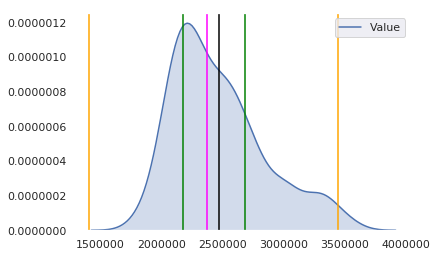

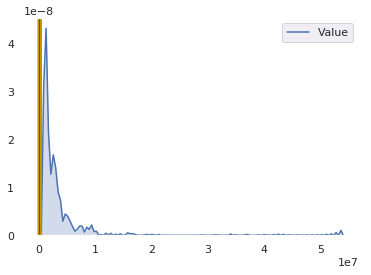

In [30]:
sns.set(color_codes=True)

for df in [supply, prod]:
    summary = df.describe()
    sns.kdeplot(df.Value, shade=True)
    
    plt.axvline(df.Value.mean(), 0, 1, color='black')         # Mean
    plt.axvline(df.Value.median(), 0, 1, color='magenta')     # Median
    plt.axvline(summary['Value']['25%'], 0, 1, color='green') # Q1
    plt.axvline(summary['Value']['75%'], 0, 1, color='green') # Q3

    IQR = summary['Value']['75%'] - summary['Value']['25%']   # IQR

    upper_outliers = summary['Value']['75%'] + 1.5*IQR        # Q3 + 1.5*IQR
    lower_outliers = summary['Value']['25%'] - 1.5*IQR        # Q1 - 1.5IQR

    plt.axvline(upper_outliers, 0, 1, color='orange')         # Upper Outlier
    plt.axvline(lower_outliers, 0, 1, color='orange')         # Lower Outlier
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show();
    
#     Add relevant labels for storytelling

# sns.kdeplot(np.log10(df.Value+1), shade=True)

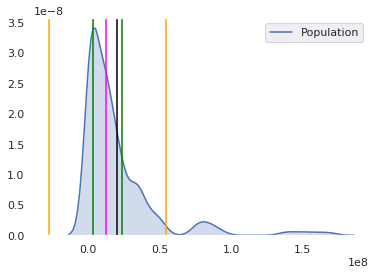

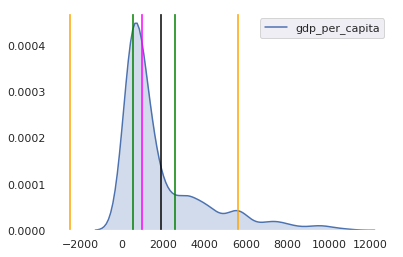

In [31]:
for df, v in [(population,'Population'), (gdp_pc,'gdp_per_capita')]:
    summary = df.describe()
    sns.kdeplot(df[v], shade=True)
    
    plt.axvline(df[v].mean(), 0, 1, color='black')         # Mean
    plt.axvline(df[v].median(), 0, 1, color='magenta')     # Median
    plt.axvline(summary[v]['25%'], 0, 1, color='green') # Q1
    plt.axvline(summary[v]['75%'], 0, 1, color='green') # Q3

    IQR = summary[v]['75%'] - summary[v]['25%']   # IQR

    upper_outliers = summary[v]['75%'] + 1.5*IQR        # Q3 + 1.5*IQR
    lower_outliers = summary[v]['25%'] - 1.5*IQR        # Q1 - 1.5IQR

    plt.axvline(upper_outliers, 0, 1, color='orange')         # Upper Outlier
    plt.axvline(lower_outliers, 0, 1, color='orange')         # Lower Outlier
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show();

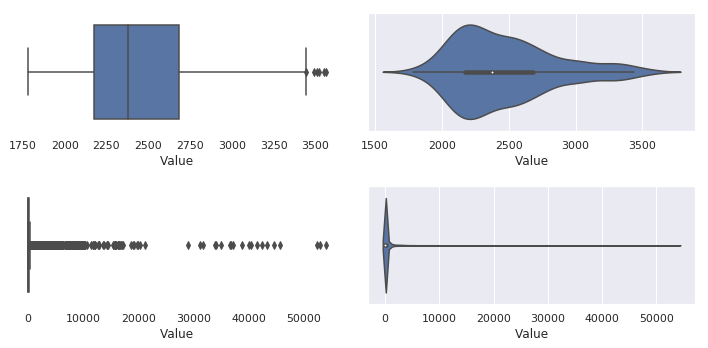

In [32]:
# box plots
# sns.boxplot(x='GRE Score', data=admission_data, orient='v')
plt.figure(figsize=(10,5))

plt.subplot(221)
sns.boxplot(x=supply.Value/1000)#, color = '#F15B2A')
ax = plt.gca()
ax.set_facecolor('white')

plt.subplot(222)
sns.violinplot(x=supply.Value/1000)
# plt.violinplot(supply.Value, showmeans=True, showmedians=True, vert=False)

plt.subplot(223)
sns.boxplot(x=prod.Value/1000)#, color = '#F15B2A')
ax = plt.gca()
ax.set_facecolor('white')

plt.subplot(224)
sns.violinplot(x=prod.Value/1000)


plt.tight_layout()

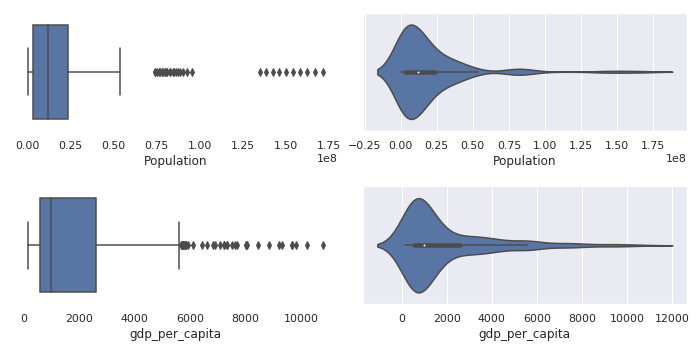

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(221)
sns.boxplot(x=population.Population)
ax = plt.gca()
ax.set_facecolor('white')

plt.subplot(222)
sns.violinplot(x=population.Population)

plt.subplot(223)
sns.boxplot(x=gdp_pc.gdp_per_capita)
ax = plt.gca()
ax.set_facecolor('white')

plt.subplot(224)
sns.violinplot(x=gdp_pc.gdp_per_capita)

plt.tight_layout()

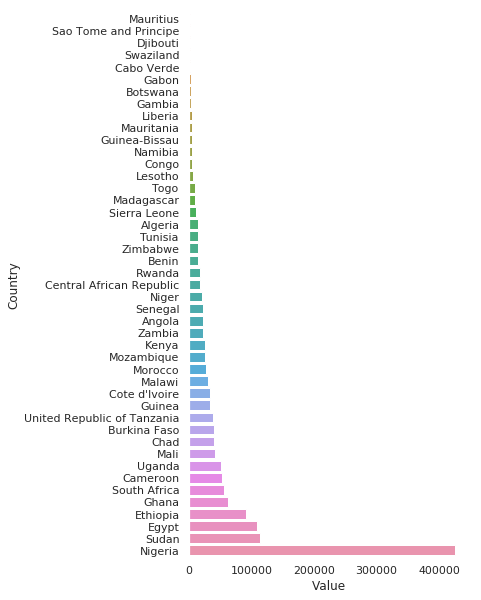

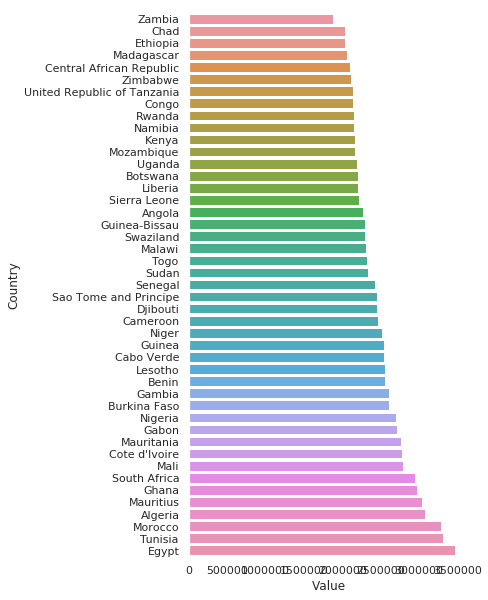

In [34]:
for df in [prod, supply]:
    series = df.groupby('Country').Value.median().sort_values()
    plt.figure(figsize=(5,10))
    sns.barplot(x=series, y=series.index)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

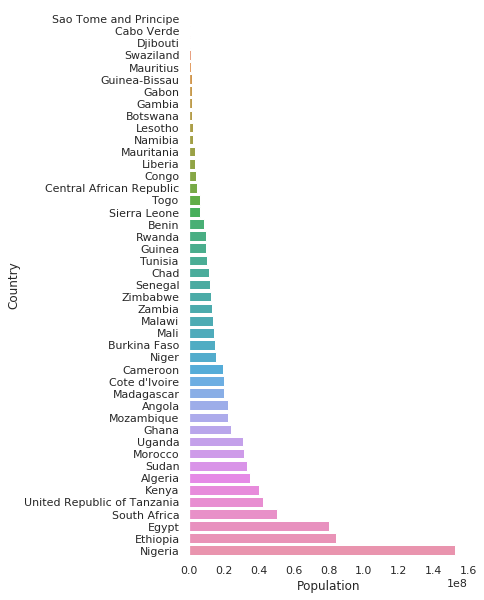

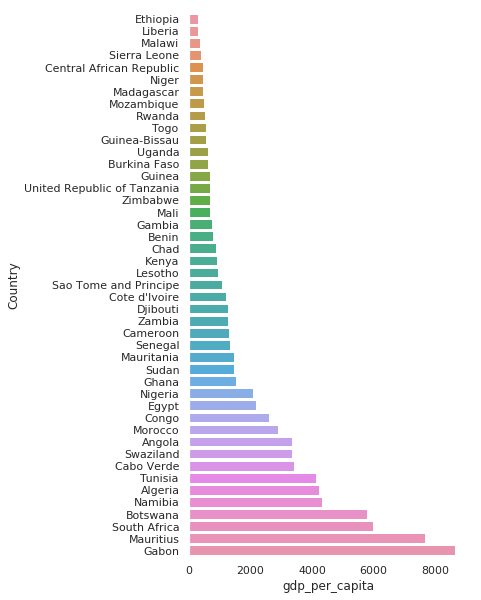

In [35]:
for df, v in [(population,'Population'), (gdp_pc, 'gdp_per_capita')]:
    series = df.groupby('Country')[v].median().sort_values()
    plt.figure(figsize=(5,10))
    sns.barplot(x=series, y=series.index)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

In [36]:
def melt_by_year(df, column):
    temp = df.groupby('Year')[column].describe().reset_index()
    temp['IQR'] = temp['75%'] - temp['25%']
    temp.rename(columns={'50%':'median'}, inplace=True)
    temp = pd.melt(temp,
                   id_vars=['Year'],
                   value_vars=['mean','median','std'],#,'IQR'],
                   value_name=column,
                   var_name='Statistic'
                  )
    
    return temp

In [37]:
melt_by_year(supply, 'Value').sample(10)

,Year,Statistic,Value
9,2013,mean,2.532244e+06
29,2013,std,3.968613e+05
7,2011,mean,2.515422e+06
11,2005,median,2.311000e+06
3,2007,mean,2.447756e+06
21,2005,std,3.647288e+05
14,2008,median,2.439000e+06
24,2008,std,3.788951e+05
26,2010,std,3.857573e+05
27,2011,std,3.837285e+05


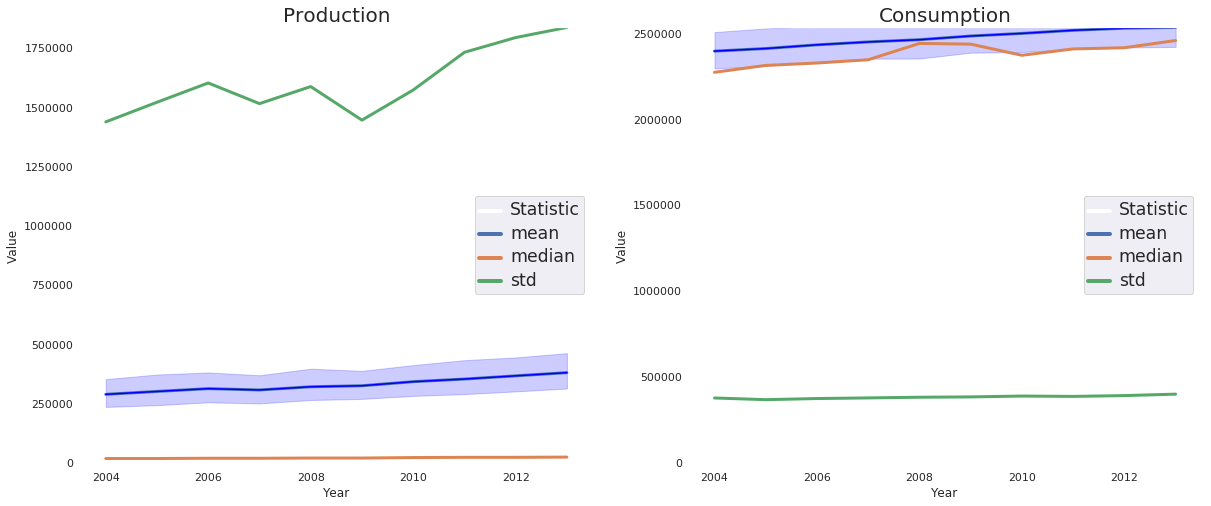

In [62]:
plt.figure(figsize=(20,8))
for indx, df, title in [(1,prod,'Production'), (2,supply,'Consumption')]:
    plt.subplot(1,2, indx)
    sns.lineplot(x='Year', y='Value', hue='Statistic',
                 data = melt_by_year(df, 'Value'),
                 linewidth=3
                )
    sns.lineplot(x='Year', y='Value', data=df, color='blue')
    plt.title(title, fontdict={'fontsize':20})
    axes = plt.gca()
    axes.set_ylim([0,melt_by_year(df, 'Value')['Value'].max()])
    axes.set_facecolor('white')
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(4)
    for text in leg.get_texts():
        text.set_fontsize('x-large')


plt.show()

* The mean **Consumption** rate is **ten times** the quantity of **Production** in Africa. This observation occurs with a steady increase over the years.<br>
$t-test= -103.13$, $p-value=0.000$, dissimilar variances assumed. *See proof below*
* Large range of values of the Standard deviation in Production reveals a **much** wider variability in Production compared to Consumption. A steady increase in this variability (the green line)is observed for Production (but fairly constant for Consumption)

In [63]:
prod_values = prod.groupby(by=['Country', 'Year'], 
                           as_index=False).Value.mean().loc[:,'Value']

print("mean quantity of food produced =", round(prod_values.mean(), 2))
print("mean quantity of food consumed =", f'{supply.Value.mean():,.2f}')
print('')
print(prod_values.shape == supply.Value.shape)
print('')
# t-test done with similar array shapes, similar variances
print(stats.ttest_ind(prod_values, supply.Value),
      "with similar variances assumed (& equal shapes)") 

print(stats.ttest_ind(prod.Value, supply.Value, equal_var=False),
      "with disimilar variances assumed") # disimilar shapes, disimilar variances

mean quantity of food produced = 277629.45
mean quantity of food consumed = 2,469,775.56

True

Ttest_indResult(statistic=-80.61449341621031, pvalue=0.0) with similar variances assumed (& equal shapes)
Ttest_indResult(statistic=-103.13835021455829, pvalue=0.0) with disimilar variances assumed


In [40]:
prod.Year.median()

2008.0

The average daily required nutritional calorie per day for an individual in Africa is **2,043 cal**.<br>This was calculated by adjusting for Calorie (by age and sex)$^1$, then weighted by percentage of population by age and sex$^2$. <br> These calculations were base of 2008 being the median Year ``prod['Year'].median()``

Calorie to Tonnes conversion factor$^3$ is `1 /  7716179.1764707`<br>
Given the above values:
   * we can calculate Total **calorie required** per year per country, then convert to metric tonnes
   *  `supply['Value']` gives us Total **calorie consumed** in tonnes.

<br> With these, we can estimate calorie deficit and answer the questions:
* Is there a nutritional gap?
* How well does Africa feed?:
    * Adequate nutrition? or
    * Malnutrition?
* Which select countries are under nourished( and adequately nourished)
* In these select countries what are their respective Production *versus* Consumption patterns (compared to the Continental averages)
    

sources:<br>
1 https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines/guidelines/appendix-2/ <br>
2 https://www.populationpyramid.net/africa/2008/<br>
3 https://www.convertunits.com/from/calories/to/metric+ton


In [41]:
factor = 1 / 7716179.1764707
factor 

1.2959782000000027e-07

In [42]:
def get_population_values():
    indx = pd.IndexSlice
    temp_pop = population.set_index(['Country','Year'])
    population_values = []
    
    for row in supply.iterrows():
        country = row[1]['Country']
        year = row[1]['Year']
        pop = temp_pop.loc[indx[country, year]]['Population']
        population_values.append(pop)
    
    population_values = pd.Series(population_values)
    
    return population_values

In [45]:
supply['required'] = (factor * 2043 * 365 * get_population_values()).round(2)
supply.head()

,Country,Year,Value,required
0,Algeria,2004,2987000,3159384.26
1,Algeria,2005,2958000,3203603.74
2,Algeria,2006,3047000,3251081.93
3,Algeria,2007,3041000,3301911.81
4,Algeria,2008,3048000,3356381.07


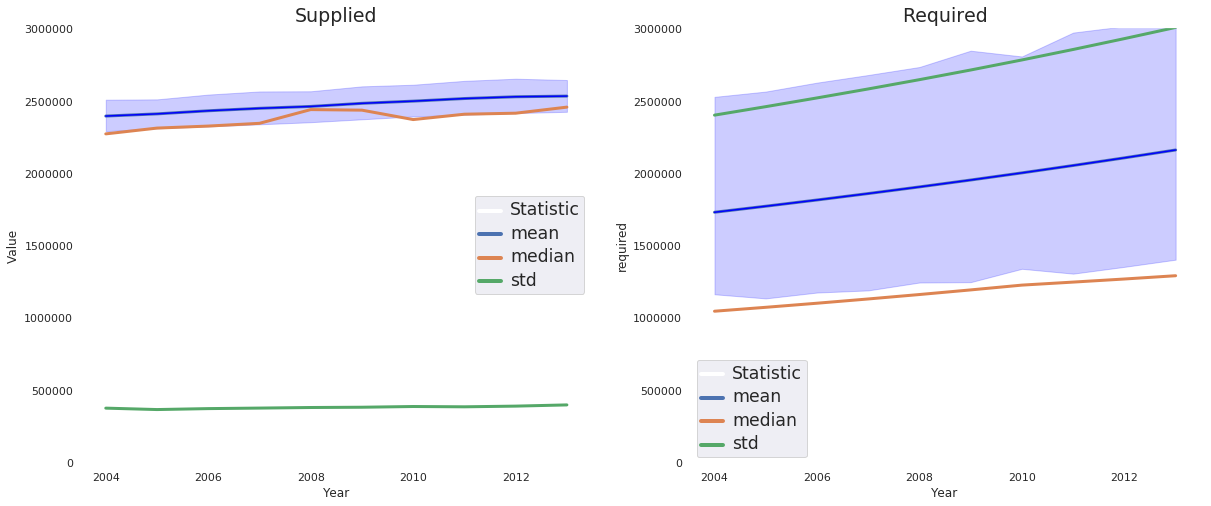

In [46]:
plt.figure(figsize=(20,8))
for indx, df, column, title in [(1,supply, 'Value', 'Supplied'),
                                (2,supply, 'required', 'Required')]:
    plt.subplot(1,2, indx)
    sns.lineplot(x='Year', y=column, hue='Statistic',
                 data = melt_by_year(df, column),
                 linewidth=3
                )
    sns.lineplot(x='Year', y=column, data=df, color='blue')
    plt.title(title, fontdict={'fontsize':19})
    axes = plt.gca()
    axes.set_ylim([0,melt_by_year(df, 'required')['required'].max()])
    axes.set_facecolor('white')
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(4)
    for text in leg.get_texts():
        text.set_fontsize('x-large')


plt.show()

The mean quantity of food supplied for consumption in Africa is significantly$^1$ higher than required by approximately 10-fold$^2$.<br>
Is Africa 'eating' more than is needed?<br>
No!By apriori knowledge , there is widespread under-nutrition in Africa.<br>
So what explains this 'over-supply' despite the under-nutrition?<br>
Could it be:
   * unequal food supply (the rich-poor disparity) or
   * An inefficient food-supply chain leading to
        * Food wastages in transit or
        * Wastages from poor storage facilities<br>

All these are conjectures requiring further data gathering and  analysis.

$1._$ `stats.ttest_ind(supply.Value, supply.required, equal_var=False)`<br>
.......`Ttest_indResult(statistic=4.205001415295241, pvalue=3.130260765349647e-05)`<br>

$2._$ `(supply.Value / supply.required).mean().round()`<br>
.......`10.0`

